In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

import os
import pandas as pd

2024-10-23 20:45:25.885537: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
import json
import sys

from tqdm import tqdm
config_file = "config_kdv.json"

# forcing_type = "linear"

forcing_type = "sin"

with open(config_file, "r") as f:
    config = json.load(f)[forcing_type]

data_path = config["data_settings"]["data_path"]
weights_path = config["nn_settings"]["weights_path"]
figures_path = config["data_settings"]["figures_path"]


In [4]:
# Function to check if a directory exists, and create it if not
def ensure_directory_exists(path):
    if not os.path.exists(path):
        os.makedirs(path)
        print(f"Directory {path} created.")
    else:
        print(f"Directory {path} already exists.")

# Check all paths
ensure_directory_exists(data_path)
ensure_directory_exists(weights_path)
ensure_directory_exists(figures_path)

Directory kdv_results/data created.


In [5]:
tau = 10
results_dict = np.load(os.path.join(data_path, forcing_type+'_tau_'+str(tau)+'_tracking_results.npy'), allow_pickle=True)
# eig_value_64 = results_dict[()]["eigen_value"]
# pk_opt_soln_mass_64 = results_dict[()]["pk_opt_soln_mass"]
# pk_opt_soln_momentum_64 = results_dict[()]["pk_opt_soln_momentum"]

In [4]:
pk_kdv_opt_momentum_0 = results_dict[()]["pk_kdv_opt_momentum_0"]
linear_kdv_opt_momentum_0 = results_dict[()]["linear_kdv_opt_momentum_0"]
bilinear_kdv_opt_momentum_0 = results_dict[()]["bilinear_kdv_opt_momentum_0"]
pk_kdv_opt_momentum_5 = results_dict[()]["pk_kdv_opt_momentum_5"]
linear_kdv_opt_momentum_5 = results_dict[()]["linear_kdv_opt_momentum_5"]
bilinear_kdv_opt_momentum_5 = results_dict[()]["bilinear_kdv_opt_momentum_5"]
pk_kdv_opt_mass_0 = results_dict[()]["pk_kdv_opt_mass_0"]
linear_kdv_opt_mass_0 = results_dict[()]["linear_kdv_opt_mass_0"]
bilinear_kdv_opt_mass_0 = results_dict[()]["bilinear_kdv_opt_mass_0"]
pk_kdv_opt_mass_5 = results_dict[()]["pk_kdv_opt_mass_5"]
linear_kdv_opt_mass_5 = results_dict[()]["linear_kdv_opt_mass_5"]
bilinear_kdv_opt_mass_5 = results_dict[()]["bilinear_kdv_opt_mass_5"]
mass_ref = results_dict[()]["mass_ref"]
momentum_ref = results_dict[()]["momentum_ref"]
pk_t_list_momentum_0 = results_dict[()]["pk_t_list_momentum_0"]
linear_t_list_momentum_0 = results_dict[()]["linear_t_list_momentum_0"]
bilinear_t_list_momentum_0 = results_dict[()]["bilinear_t_list_momentum_0"]
pk_t_list_momentum_5 = results_dict[()]["pk_t_list_momentum_5"]
linear_t_list_momentum_5 = results_dict[()]["linear_t_list_momentum_5"]
bilinear_t_list_momentum_5 = results_dict[()]["bilinear_t_list_momentum_5"]

kdv_opt_mass = np.load(os.path.join(data_path, 'kdv_'+forcing_type+'_opt_mass.npy'))

In [5]:
# Plot setting
linear_curve = "darkorange"
linear_shadow = "navajowhite"
bilinear_curve = "forestgreen"
bilinear_shadow = "darkseagreen"
pk_curve = "darkblue"
pk_shadow = "lightsteelblue"
ref_color = "black"


exact_color = "darkred"
linear_no_penalty_color = "gold"
bilinear_no_penalty_color = "turquoise"
pk_no_penalty_color = "palevioletred"

label_font = 24
ticks_font = 22
legend_font = 24
linewidth = 2.5
title_font = 16

linear_linestyle = "dashdot"
bilinear_linestyle = "dotted"
pk_linestyle = "solid"

Text(0, 0.5, 'Mass')

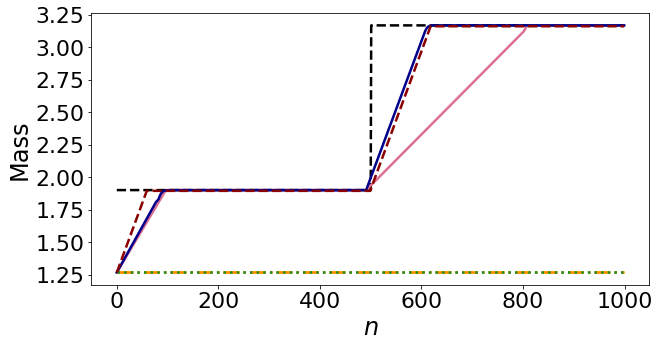

In [6]:
plt.figure(figsize=(10, 5))
plt.plot(mass_ref, label="Reference", linestyle="--", color=ref_color, linewidth=linewidth)

plt.plot(
    pk_kdv_opt_mass_0,
    label=r"$Ours(\lambda = 0)$",
    color=pk_no_penalty_color, 
    linestyle=pk_linestyle, 
    linewidth=linewidth
)
plt.plot(
    linear_kdv_opt_mass_0,
    label=r"$M2(\lambda = 0)$",
    color=linear_no_penalty_color,
    linestyle=linear_linestyle,
    linewidth=linewidth
)
plt.plot(
    bilinear_kdv_opt_mass_0,
    label=r"$M3(\lambda = 0)$",
    color=bilinear_no_penalty_color,
    linestyle=bilinear_linestyle,
    linewidth=linewidth
)

plt.plot(
    pk_kdv_opt_mass_5,
    label=r"$Ours(\lambda = 0.005)$",
    color=pk_curve, 
    linestyle=pk_linestyle, 
    linewidth=linewidth
)

plt.plot(
    linear_kdv_opt_mass_5,
    label=r"$M2(\lambda = 0.005)$",
    color=linear_curve,
    linestyle=linear_linestyle,
    linewidth=linewidth
)
plt.plot(
    bilinear_kdv_opt_mass_5,
    label=r"$M3(\lambda = 0.005)$",
    color=bilinear_curve,
    linestyle=bilinear_linestyle,
    linewidth=linewidth
)

plt.plot(kdv_opt_mass,
         label="KdV",
         color=exact_color,
         linestyle="--",
         linewidth=linewidth)


plt.xticks(fontsize=ticks_font)
plt.yticks(fontsize=ticks_font)
plt.xlabel(r"$n$", fontsize=label_font)
plt.ylabel("Mass", fontsize=label_font)
# # # plt.legend(fontsize=legend_font, loc=(1.05, 0.001))
# plt.savefig(os.path.join(figures_path, 'kdv_'+forcing_type+'_mass_tracking_tau'+str(tau)+'.png'), dpi=200, bbox_inches='tight')
# plt.savefig(os.path.join(figures_path, 'kdv_'+forcing_type+'_mass_tracking_tau'+str(tau)+'.pdf'), dpi=200, bbox_inches='tight')



Text(0, 0.5, 'Momentum')

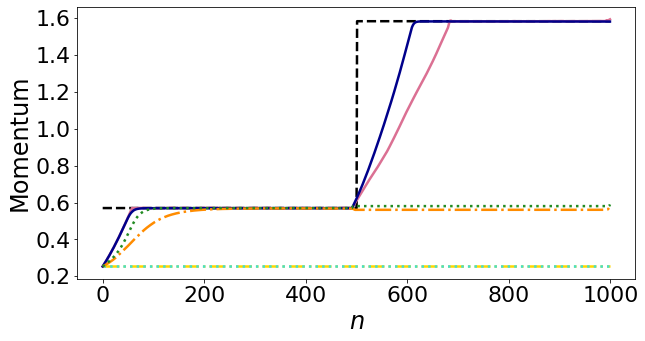

In [7]:
plt.figure(figsize=(10, 5))
plt.plot(momentum_ref, label="Reference", linestyle="--", color=ref_color, linewidth=linewidth)

plt.plot(
    pk_kdv_opt_momentum_0,
    label=r"$Ours(\lambda = 0)$",
    color=pk_no_penalty_color, 
    linestyle=pk_linestyle, 
    linewidth=linewidth
)
plt.plot(
    linear_kdv_opt_momentum_0,
    label=r"$M2(\lambda = 0)$",
    color=linear_no_penalty_color,
    linestyle=linear_linestyle,
    linewidth=linewidth
)
plt.plot(
    bilinear_kdv_opt_momentum_0,
    label=r"$M3(\lambda = 0)$",
    color=bilinear_no_penalty_color,
    linestyle=bilinear_linestyle,
    linewidth=linewidth
)

plt.plot(
    pk_kdv_opt_momentum_5,
    label=r"$Ours(\lambda = 0.005)$",
    color=pk_curve, 
    linestyle=pk_linestyle, 
    linewidth=linewidth
)

plt.plot(
    linear_kdv_opt_momentum_5,
    label=r"$M2(\lambda = 0.005)$",
    color=linear_curve,
    linestyle=linear_linestyle,
    linewidth=linewidth,
)
plt.plot(
    bilinear_kdv_opt_momentum_5,
    label=r"$M3(\lambda = 0.005)$",
    color=bilinear_curve,
    linestyle=bilinear_linestyle,
    linewidth=linewidth,
)

plt.xticks(fontsize=ticks_font)
plt.yticks(fontsize=ticks_font)
plt.xlabel(r"$n$", fontsize=label_font)
plt.ylabel("Momentum", fontsize=label_font)
# plt.legend(fontsize=legend_font, loc=(1.05, 0.001))


# plt.savefig(os.path.join(figures_path, 'kdv_'+forcing_type+'_momentum_tracking_tau'+str(tau)+'.png'), dpi=200, bbox_inches='tight')
# plt.savefig(os.path.join(figures_path, 'kdv_'+forcing_type+'_momentum_tracking_tau'+str(tau)+'.pdf'), dpi=200, bbox_inches='tight')


In [8]:
pk_results = pd.read_csv(os.path.join(data_path,"results_dict_list_pk_momentum_5.csv"))
linear_results = pd.read_csv(os.path.join(data_path,"results_dict_list_linear_momentum_5.csv"))
bilinear_results = pd.read_csv(os.path.join(data_path,"results_dict_list_bilinear_momentum_5.csv"))

In [9]:
pk_t_list_momentum_5 = np.asarray(pk_t_list_momentum_5)
linear_t_list_momentum_5 = np.asarray(linear_t_list_momentum_5)
bilinear_t_list_momentum_5 = np.asarray(bilinear_t_list_momentum_5)
pk_results_nit = np.asarray(list(pk_results['nit'])[:-1]) 
linear_results_nit = np.asarray(list(linear_results['nit'])[:-1])
bilinear_results_nit = np.asarray(list(bilinear_results['nit'])[:-1])
pk_time_per_iter = pk_t_list_momentum_5 / pk_results_nit
linear_time_per_iter = linear_t_list_momentum_5 / linear_results_nit
bilinear_time_per_iter = bilinear_t_list_momentum_5 / bilinear_results_nit

/tmp/ipykernel_2926423/2915731930.py:7: RuntimeWarning: divide by zero encountered in divide
  pk_time_per_iter = pk_t_list_momentum_5 / pk_results_nit
/tmp/ipykernel_2926423/2915731930.py:8: RuntimeWarning: divide by zero encountered in divide
  linear_time_per_iter = linear_t_list_momentum_5 / linear_results_nit
/tmp/ipykernel_2926423/2915731930.py:9: RuntimeWarning: divide by zero encountered in divide
  bilinear_time_per_iter = bilinear_t_list_momentum_5 / bilinear_results_nit


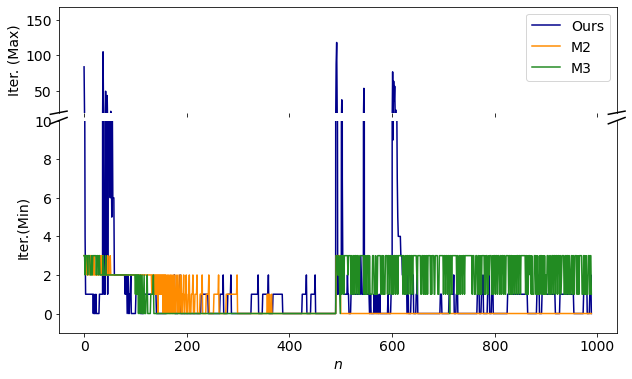

In [10]:
label_font = 14

max_max_value = tf.reduce_max(pk_results_nit) + 50
min_max_value = 20
max_min_value = 10
min_min_value = -1

fig, (ax, ax2) = plt.subplots(2, 1, sharex=True, figsize=(10, 6), gridspec_kw={'height_ratios': [1, 2], 'hspace': 0.05})

# Main plot
ax.plot(pk_results_nit, label='Ours', color=pk_curve)
ax.plot(linear_results_nit, label='M2', color=linear_curve)
ax.plot(bilinear_results_nit, label='M3', color=bilinear_curve)
ax.set_ylim(min_max_value, max_max_value)
ax.spines['bottom'].set_visible(False)
ax.tick_params(labeltop=False)  # Hide the top tick labels
ax.legend(fontsize=label_font)

# Subplot for emphasizing lower values
ax2.plot(pk_results_nit, label='Ours', color=pk_curve)
ax2.plot(linear_results_nit, label='M2', color=linear_curve)
ax2.plot(bilinear_results_nit, label='M3', color=bilinear_curve)
ax2.set_ylim(min_min_value, max_min_value)
ax2.spines['top'].set_visible(False)
# ax2.legend(fontsize=label_font)

# Add break indicators (here using small diagonal slashes)
d = .015  # size of the diagonal slashes
kwargs = dict(transform=ax.transAxes, color='k', clip_on=False)
ax.plot((-d, +d), (-d, +d), **kwargs)        # top-left corner
ax.plot((1 - d, 1 + d), (-d, +d), **kwargs)  # top-right corner

kwargs.update(transform=ax2.transAxes)  # switch to the second (sub) axis
ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)  # bottom-left corner
ax2.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)  # bottom-right corner

plt.xlabel(r'$n$', fontsize=label_font)
plt.xticks(fontsize=label_font)
plt.yticks(fontsize=label_font)
ax.set_ylabel('Iter. (Max)', fontsize=label_font)
ax2.set_ylabel('Iter.(Min)', fontsize=label_font)

ax.tick_params(axis='x', labelsize=label_font)
ax.tick_params(axis='y', labelsize=label_font)
ax2.tick_params(axis='y', labelsize=label_font)


# plt.savefig(os.path.join(figures_path, 'kdv_'+forcing_type+'_momentum_iter.png'), dpi=200, bbox_inches='tight')
# plt.savefig(os.path.join(figures_path, 'kdv_'+forcing_type+'_momentum_iter.pdf'), dpi=200, bbox_inches='tight')




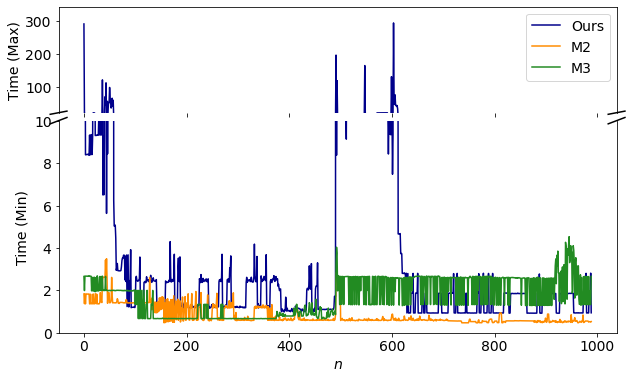

In [11]:
label_font = 14

max_max_value = tf.reduce_max(pk_t_list_momentum_5) + 50
min_max_value = 20
max_min_value = 10

fig, (ax, ax2) = plt.subplots(2, 1, sharex=True, figsize=(10, 6), gridspec_kw={'height_ratios': [1, 2], 'hspace': 0.05})

# Main plot
ax.plot(pk_t_list_momentum_5, label='Ours', color=pk_curve)
ax.plot(linear_t_list_momentum_5, label='M2', color=linear_curve)
ax.plot(bilinear_t_list_momentum_5, label='M3', color=bilinear_curve)
ax.set_ylim(min_max_value, max_max_value)
ax.spines['bottom'].set_visible(False)
ax.tick_params(labeltop=False)  # Hide the top tick labels
ax.legend(fontsize=label_font)

# Subplot for emphasizing lower values
ax2.plot(pk_t_list_momentum_5, label='Ours', color=pk_curve)
ax2.plot(linear_t_list_momentum_5, label='M2', color=linear_curve)
ax2.plot(bilinear_t_list_momentum_5, label='M3', color=bilinear_curve)
ax2.set_ylim(0, max_min_value)
ax2.spines['top'].set_visible(False)
# ax2.legend(fontsize=label_font)

plt.xticks(fontsize=label_font)
plt.yticks(fontsize=label_font)

# Add break indicators (here using small diagonal slashes)
d = .015  # size of the diagonal slashes
kwargs = dict(transform=ax.transAxes, color='k', clip_on=False)
ax.plot((-d, +d), (-d, +d), **kwargs)        # top-left corner
ax.plot((1 - d, 1 + d), (-d, +d), **kwargs)  # top-right corner

kwargs.update(transform=ax2.transAxes)  # switch to the second (sub) axis
ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)  # bottom-left corner
ax2.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)  # bottom-right corner

plt.xlabel(r'$n$', fontsize=label_font)
ax.set_ylabel('Time (Max)', fontsize=label_font)
ax2.set_ylabel('Time (Min)', fontsize=label_font)

ax.tick_params(axis='x', labelsize=label_font)
ax.tick_params(axis='y', labelsize=label_font)
ax2.tick_params(axis='y', labelsize=label_font)

# plt.savefig(os.path.join(figures_path, 'kdv_'+forcing_type+'_momentum_t_list.png'), dpi=200, bbox_inches='tight')
# plt.savefig(os.path.join(figures_path, 'kdv_'+forcing_type+'_momentum_t_list.pdf'), dpi=200, bbox_inches='tight')




In [18]:
print('pk', np.mean(pk_t_list_momentum_5))
print('linear', np.mean(linear_t_list_momentum_5))
print('bilinear', np.mean(bilinear_t_list_momentum_5))


pk 5.816543083460917
linear 0.8379264760186145
bilinear 1.6942181235256524


In [143]:
pk_time_per_iter

array([3.47907820e+00, 9.27396570e-01, 4.42054462e+00, 8.38867259e+00,
       8.40148664e+00, 8.40039897e+00, 8.40004921e+00, 8.41652822e+00,
       8.41261506e+00, 8.40450764e+00, 8.36748576e+00, 9.32148790e+00,
       8.38691831e+00, 9.32235122e+00, 8.40199614e+00, 9.34407043e+00,
       8.40397668e+00, 9.32622123e+00,            inf, 1.96123402e+01,
                  inf,            inf,            inf, 9.31281614e+00,
                  inf,            inf,            inf,            inf,
                  inf,            inf, 9.33114886e+00, 1.02603886e+01,
       9.32548046e+00, 1.02447464e+01, 9.32896161e+00, 9.32975268e+00,
       1.20688576e+02, 6.18726957e-02, 1.16027895e+00, 6.50763798e+00,
       4.64220774e+00, 6.87592416e+01, 8.72515779e-01, 5.58066287e+01,
       3.51774096e-01, 1.25861745e+00, 8.43753195e+00, 1.81514168e+00,
       5.15769989e+00, 5.62834014e+00, 7.49823121e+00, 1.11051111e+01,
       2.23868486e+00, 4.29055080e+00, 8.14439621e+00, 5.85786007e+00,
      

In [144]:
linear_time_per_iter

array([0.61067716, 0.45723192, 0.60927582, 0.45473448, 0.60850883,
       0.61088888, 0.91315365, 0.60866189, 0.9115119 , 0.60825777,
       0.61072652, 0.68140054, 0.45609625, 0.6068124 , 0.45721173,
       0.45660814, 0.46174423, 0.68456638, 0.61048071, 0.68393552,
       0.45601273, 0.68494809, 0.92062306, 0.91519284, 0.68589699,
       0.90931487, 0.68246496, 0.68685317, 0.68353891, 0.45301398,
       0.45841932, 0.72501254, 0.63266563, 0.73209381, 0.73241711,
       0.47515257, 1.24032843, 0.87241085, 1.31266642, 1.3074522 ,
       1.30863893, 1.31107974, 1.71543276, 1.30969846, 1.74725759,
       1.29859972, 0.46317856, 0.92886746, 0.94555974, 0.94371927,
       0.70748174, 0.47240607, 0.71998751, 0.76368105, 1.30617511,
       0.87750959, 0.70525408, 0.70760536, 0.71017766, 0.70619524,
       0.70723641, 0.70673883, 0.70471346, 0.70748889, 0.73623586,
       0.8034066 , 0.77743745, 0.69442797, 0.69570529, 0.69278514,
       0.71715891, 0.71634066, 0.71736884, 0.71700799, 0.71688

In [90]:
bilinear_time_per_iter

array([0.88558523, 0.66355093, 1.33487642, 0.89089306, 0.89067856,
       0.88978275, 0.88819551, 1.33307815, 0.89291128, 0.88804611,
       0.89553134, 0.88702838, 1.33647537, 1.33471048, 1.3319912 ,
       0.65891584, 1.30626202, 0.8677667 , 0.65479724, 0.86720967,
       0.8740797 , 0.65301609, 0.64610481, 0.86569937, 0.98247838,
       0.8653845 , 0.89502621, 0.65578206, 0.98726022, 0.66005747,
       0.87321671, 1.32702172, 0.9981581 , 1.32574487, 0.99489713,
       1.32740152, 1.335657  , 0.66597176, 1.00011432, 0.99655354,
       0.99877322, 0.99746823, 0.88630819, 0.99834597, 0.99946117,
       1.0021286 , 0.99498463, 0.99534047, 0.99068701, 1.00249505,
       0.9969852 , 0.99492466, 0.99481499, 1.00147879, 0.99731147,
       0.99989331, 1.00028896, 1.00014973, 1.00238717, 0.9940784 ,
       0.99780226, 0.99388099, 0.99359083, 1.00071204, 1.00117826,
       1.000283  , 1.0020436 , 1.0023309 , 0.99947381, 1.00021672,
       0.9989444 , 0.99984884, 1.00065374, 0.99939668, 0.99282